# **Task 1**
---



In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | First our morning flight wa...
1,✅ Trip Verified | Although it was a bit uncom...
2,✅ Trip Verified | Boarding was decently organ...
3,✅ Trip Verified | Boarding on time and departu...
4,✅ Trip Verified | My original flight was canc...


In [ ]:
df.to_csv("/content/BA_reviews.csv")

In [ ]:
df

,reviews
0,✅ Trip Verified | First our morning flight wa...
1,✅ Trip Verified | Although it was a bit uncom...
2,✅ Trip Verified | Boarding was decently organ...
3,✅ Trip Verified | Boarding on time and departu...
4,✅ Trip Verified | My original flight was canc...
...,...
995,✅ Trip Verified | Glasgow to Heathrow. BA are...
996,✅ Trip Verified | London to Phoenix this week...
997,✅ Trip Verified | Glasgow to Heathrow. Very d...
998,✅ Trip Verified | Brussels to Shanghai via Lo...


In [ ]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [ ]:
df

,reviews
0,First our morning flight was cancelled and m...
1,Although it was a bit uncomfortable flight i...
2,Boarding was decently organised. The A380 st...
3,Boarding on time and departure on time for a ...
4,My original flight was cancelled just over 2...
...,...
995,"Glasgow to Heathrow. BA are a disgrace, it o..."
996,London to Phoenix this week. Having a window...
997,Glasgow to Heathrow. Very disappointed in Br...
998,Brussels to Shanghai via London Heathrow. Al...


**Rule-based approach:**

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

**Data preprocessing steps:**

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

# **Step 1: Cleaning the text**

In [ ]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,First our morning flight was cancelled and m...,First our morning flight was cancelled and mo...
1,Although it was a bit uncomfortable flight i...,Although it was a bit uncomfortable flight in...
2,Boarding was decently organised. The A380 st...,Boarding was decently organised The A still h...
3,Boarding on time and departure on time for a ...,Boarding on time and departure on time for a ...
4,My original flight was cancelled just over 2...,My original flight was cancelled just over we...


# **Step 2: Tokenization**
Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

# **Step 3: Enrichment – POS tagging**
Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

# **Step 4: Stopwords removal**
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

# **Step 5: Obtaining the stem words**
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

In [ ]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,First our morning flight was cancelled and m...,First our morning flight was cancelled and mo...,"[(First, r), (morning, n), (flight, n), (cance..."
1,Although it was a bit uncomfortable flight i...,Although it was a bit uncomfortable flight in...,"[(Although, None), (bit, n), (uncomfortable, a..."
2,Boarding was decently organised. The A380 st...,Boarding was decently organised The A still h...,"[(Boarding, n), (decently, r), (organised, v),..."
3,Boarding on time and departure on time for a ...,Boarding on time and departure on time for a ...,"[(Boarding, v), (time, n), (departure, n), (ti..."
4,My original flight was cancelled just over 2...,My original flight was cancelled just over we...,"[(original, a), (flight, n), (cancelled, v), (..."


In [ ]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,First our morning flight was cancelled and m...,First our morning flight was cancelled and mo...,"[(First, r), (morning, n), (flight, n), (cance...",First morning flight cancel move afternoon f...
1,Although it was a bit uncomfortable flight i...,Although it was a bit uncomfortable flight in...,"[(Although, None), (bit, n), (uncomfortable, a...",Although bit uncomfortable flight economy fl...
2,Boarding was decently organised. The A380 st...,Boarding was decently organised The A still h...,"[(Boarding, n), (decently, r), (organised, v),...",Boarding decently organise still rather stra...
3,Boarding on time and departure on time for a ...,Boarding on time and departure on time for a ...,"[(Boarding, v), (time, n), (departure, n), (ti...",Boarding time departure time flight London H...
4,My original flight was cancelled just over 2...,My original flight was cancelled just over we...,"[(original, a), (flight, n), (cancelled, v), (...",original flight cancel week actual flight al...


In [ ]:
df[['reviews','Lemma']]

,reviews,Lemma
0,First our morning flight was cancelled and m...,First morning flight cancel move afternoon f...
1,Although it was a bit uncomfortable flight i...,Although bit uncomfortable flight economy fl...
2,Boarding was decently organised. The A380 st...,Boarding decently organise still rather stra...
3,Boarding on time and departure on time for a ...,Boarding time departure time flight London H...
4,My original flight was cancelled just over 2...,original flight cancel week actual flight al...
...,...,...
995,"Glasgow to Heathrow. BA are a disgrace, it o...",Glasgow Heathrow BA disgrace stand high stan...
996,London to Phoenix this week. Having a window...,London Phoenix week window seat top deck kin...
997,Glasgow to Heathrow. Very disappointed in Br...,Glasgow Heathrow disappointed British Airway...
998,Brussels to Shanghai via London Heathrow. Al...,Brussels Shanghai via London Heathrow flight...


## **Sentiment Analysis using VADER**
VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 5.5 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,First our morning flight was cancelled and m...,First our morning flight was cancelled and mo...,"[(First, r), (morning, n), (flight, n), (cance...",First morning flight cancel move afternoon f...,-0.7713,Negative
1,Although it was a bit uncomfortable flight i...,Although it was a bit uncomfortable flight in...,"[(Although, None), (bit, n), (uncomfortable, a...",Although bit uncomfortable flight economy fl...,0.6597,Positive
2,Boarding was decently organised. The A380 st...,Boarding was decently organised The A still h...,"[(Boarding, n), (decently, r), (organised, v),...",Boarding decently organise still rather stra...,0.9069,Positive
3,Boarding on time and departure on time for a ...,Boarding on time and departure on time for a ...,"[(Boarding, v), (time, n), (departure, n), (ti...",Boarding time departure time flight London H...,0.8736,Positive
4,My original flight was cancelled just over 2...,My original flight was cancelled just over we...,"[(original, a), (flight, n), (cancelled, v), (...",original flight cancel week actual flight al...,0.6486,Positive


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    538
Negative    352
Neutral     110
Name: Analysis, dtype: int64

# **Visual Representation**

([<matplotlib.patches.Wedge at 0x7f1348303940>,
 [Text(-0.13100683356568732, 1.0921708701293458, 'Positive'),
  Text(-0.24669792697222784, -1.0719795393698546, 'Negative'),
  Text(1.2701889961293427, -0.45729630887634853, 'Neutral')],
 [Text(-0.07145827285401125, 0.5957295655250977, '53.8%'),
  Text(-0.13456250562121516, -0.5847161123835569, '35.2%'),
  Text(0.799748627192549, -0.287927305588812, '11.0%')])

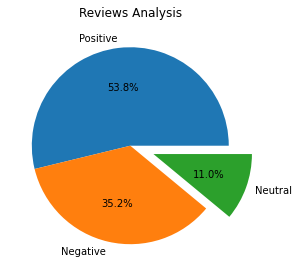

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [ ]:
df.to_csv("BA_reviews.csv")